In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Represent time series as `np array`.

In [2]:
q = np.array([1, 1, 1, 2, 2, 3, 3, 4])  # |q|=m=8
c = np.array([1, 1, 1, 1, 2, 3, 3, 3, 4, 4, 5, 6, 7])  # |c|=n=13
# l = 2
# k ranges from m/l = 8/2 = 4 to min(lm,n) = min(2*8,13) = 13 (i.e, k = 4..13)
# L = 13

In [3]:
len(q), len(c)  # lengths

(8, 13)

A prefix of $C$ with length = 10

In [4]:
c_0_10 = c[0:10]  # The first entry is included, the last entry is excluded
c_0_10

array([1, 1, 1, 1, 2, 3, 3, 3, 4, 4])

In [5]:
type(c_0_10)

numpy.ndarray

Another example

In [6]:
# Data from https://jmotif.github.io/sax-vsm_site/morea/algorithm/znorm.html
q = np.array(
    [
        2.02,
        2.33,
        2.99,
        6.85,
        9.20,
        8.80,
        7.50,
        6.00,
        5.85,
        3.85,
        4.85,
        3.85,
        2.22,
        1.45,
        1.34,
    ]
)
q = pd.Series(q)

In [7]:
c = pd.Series(
    np.array(
        [
            -0.12,
            -0.16,
            -0.13,
            0.28,
            0.37,
            0.39,
            0.18,
            0.09,
            0.15,
            -0.06,
            0.06,
            -0.07,
            -0.13,
            -0.18,
            -0.26,
        ]
    )
)

In [8]:
from dtaidistance import ed as dtaidistance_ed

In [9]:
def dtai_ed(a, b, l=1, r=0.1):
    if len(a) != len(b):
        raise ValueError("a and b must have the same length")
    # https://dtaidistance.readthedocs.io/en/latest/usage/ed.html
    return dtaidistance_ed.distance(a, b)

In [10]:
dtai_ed(q, c)

19.942780648645762

In [11]:
type(q)

pandas.core.series.Series

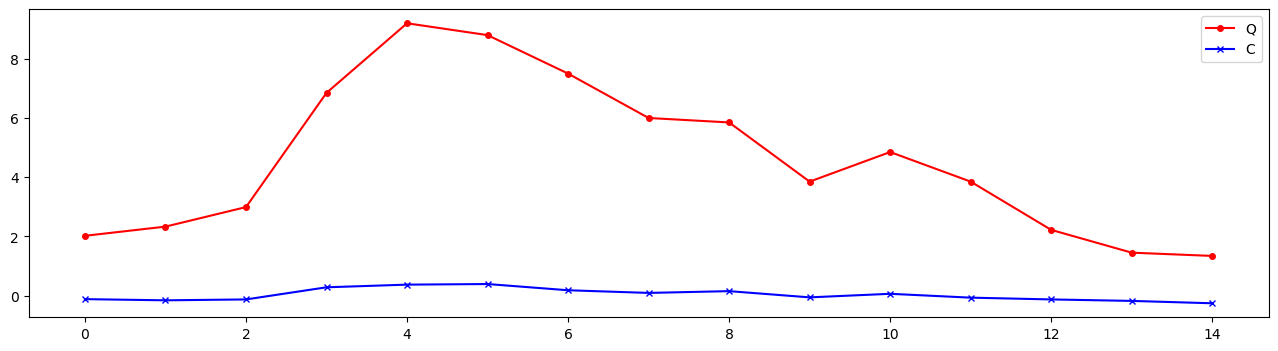

In [12]:
from sktime.utils.plotting import plot_series

fig, ax = plot_series(
    q, c, markers=["o", "x"], colors=["red", "blue"], labels=["Q", "C"]
)

#  Z-normalization

In [13]:
def normalize(ts):
    mean = np.mean(ts)
    std = np.std(ts)
    return (ts - mean) / std

A simple Z-normalization function

Standard Z-normalizer from library

z_normalize only works for `series` but not `np array`.

In [14]:
q_znorm = normalize(q)
c_znorm = normalize(c)

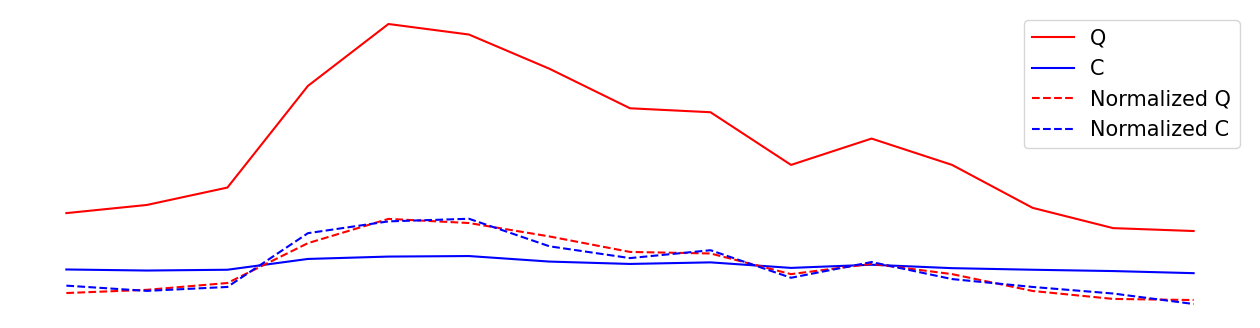

In [15]:
import matplotlib.pyplot as plt

fig, ax = plot_series(
    q,
    c,
    q_znorm,
    c_znorm,
    markers=[None, None, None, None],
    colors=["red", "blue", "red", "blue"],
    labels=["Q", "C", "Normalized Q", "Normalized C"],
)
# fig, ax = plot_series(q, c, q_znorm, c_znorm, markers=["o", "x", "o", "x"], colors=["red", "blue", "red", "blue"], labels=["Q", "C", "Normalized Q", "Normalized C"]) fig, ax = plot_series(q, c, q_znorm, c_znorm, colors=["red", "blue", "red", "blue"], labels=["Q", "C", "Normalized Q", "Normalized C"])
ax.lines[2].set_linestyle("--")  # Dashed line for the first series
ax.lines[3].set_linestyle(("--"))  # Dotted line for the second series
# https://stackoverflow.com/questions/51054529/manipulate-linestyle-in-matplotlib-legend
plt.axis("off")
ax.legend(fontsize=15)
plt.savefig("../figures/normalization.pdf", format="pdf", bbox_inches="tight")
plt.show()

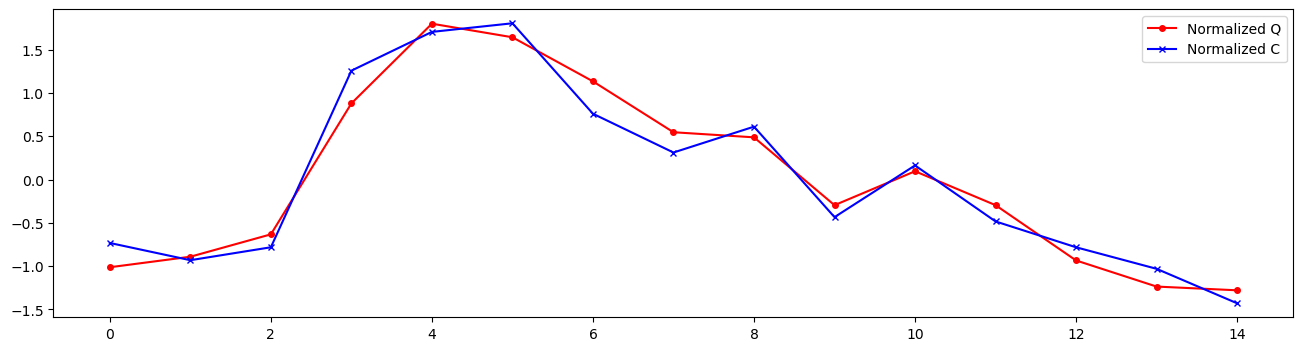

In [16]:
fig, ax = plot_series(
    q_znorm,
    c_znorm,
    markers=["o", "x"],
    colors=["red", "blue"],
    labels=["Normalized Q", "Normalized C"],
)
# https://stackoverflow.com/questions/51054529/manipulate-linestyle-in-matplotlib-legend
ax.legend()
plt.show()

# Another Example

In [17]:
part1 = np.random.rand(50)
part2 = np.random.rand(50)
part3 = np.random.rand(50)
noise1 = np.random.normal(0, 0.1, 50)  # mean 0, std 0.1
noise2 = np.random.normal(0, 0.1, 50)  # mean 0, std 0.1
noise3 = np.random.normal(0, 0.1, 50)  # mean 0, std 0.1
part1 = part1 + noise1
part2 = part2 + noise2
part3 = part3 + noise3

arr1 = np.random.rand(200)
noise = np.random.normal(0, 0.1, 200)  # mean 0, std 0.1
arr2 = arr1 + noise

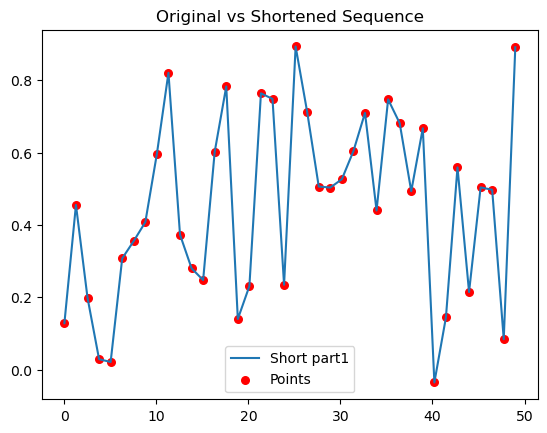

In [18]:
# Create a shorter version of part1 that preserves its overall shape using interpolation
from scipy.interpolate import interp1d

original_indices = np.arange(len(part1))
short_length = 40  # desired length
new_indices = np.linspace(0, len(part1) - 1, short_length)
f = interp1d(original_indices, part1, kind="linear")
short_part1 = f(new_indices)

# plt.plot(part1, label="Original part1")
plt.plot(new_indices, short_part1, label="Short part1")
plt.scatter(
    new_indices, short_part1, color="red", s=30, label="Points"
)  # Mark all points

plt.legend()
plt.title("Original vs Shortened Sequence")
plt.show()

In [19]:
new_indices

array([ 0.        ,  1.25641026,  2.51282051,  3.76923077,  5.02564103,
        6.28205128,  7.53846154,  8.79487179, 10.05128205, 11.30769231,
       12.56410256, 13.82051282, 15.07692308, 16.33333333, 17.58974359,
       18.84615385, 20.1025641 , 21.35897436, 22.61538462, 23.87179487,
       25.12820513, 26.38461538, 27.64102564, 28.8974359 , 30.15384615,
       31.41025641, 32.66666667, 33.92307692, 35.17948718, 36.43589744,
       37.69230769, 38.94871795, 40.20512821, 41.46153846, 42.71794872,
       43.97435897, 45.23076923, 46.48717949, 47.74358974, 49.        ])

In [20]:
np.arange(short_length)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

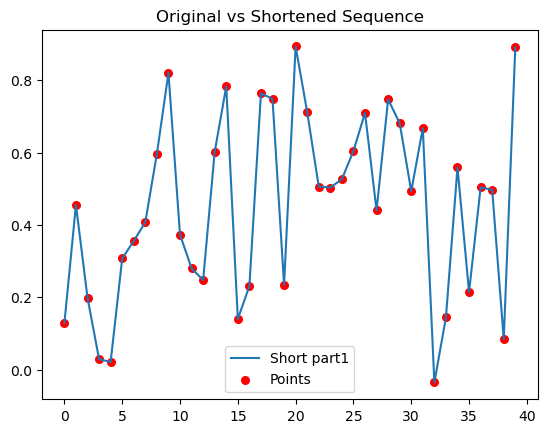

In [21]:
# plt.plot(part1, label="Original part1")
plt.plot(np.arange(short_length), short_part1, label="Short part1")
plt.scatter(
    np.arange(short_length), short_part1, color="red", s=30, label="Points"
)  # Mark all points

plt.legend()
plt.title("Original vs Shortened Sequence")
plt.show()

In [22]:
part1

array([ 0.12805763,  0.50775429,  0.30270909,  0.09942988,  0.00731266,
        0.01821557,  0.11891702,  0.78661971, -0.01406525,  0.51630687,
        0.57871947,  0.92297088,  0.58988301,  0.20530193,  0.29620569,
        0.22126874,  0.56076589,  0.68429683,  0.85147243,  0.01026981,
        0.1460909 ,  0.96944562,  0.39671136,  0.96809613,  0.12654344,
        0.89602643,  0.87504038,  0.45117428,  0.53680128,  0.49937976,
        0.50229089,  0.65875861,  0.52575352,  0.80160701,  0.40969317,
        0.76945029,  0.64461014,  0.72864846,  0.38845712,  0.68213597,
       -0.03907398, -0.02311965,  0.33914363,  0.64518205,  0.20300653,
        0.40581313,  0.82969912,  0.14703654,  0.06186513,  0.89117216])

In [23]:
short_part1

array([ 0.12805763,  0.4551786 ,  0.19846334,  0.02857048,  0.02079766,
        0.30724342,  0.35548165,  0.40751259,  0.59637339,  0.82048231,
        0.37293984,  0.27988963,  0.2473839 ,  0.60194287,  0.78288757,
        0.13968559,  0.23053754,  0.7638487 ,  0.74833276,  0.23443481,
        0.89333591,  0.71201496,  0.50606338,  0.50321787,  0.52636285,
        0.60419241,  0.70965585,  0.43984039,  0.74704308,  0.68124223,
        0.49313137,  0.66707551, -0.03580129,  0.14407879,  0.55886352,
        0.21434436,  0.50363297,  0.49711991,  0.08370395,  0.89117216])

In [24]:
new_indices

array([ 0.        ,  1.25641026,  2.51282051,  3.76923077,  5.02564103,
        6.28205128,  7.53846154,  8.79487179, 10.05128205, 11.30769231,
       12.56410256, 13.82051282, 15.07692308, 16.33333333, 17.58974359,
       18.84615385, 20.1025641 , 21.35897436, 22.61538462, 23.87179487,
       25.12820513, 26.38461538, 27.64102564, 28.8974359 , 30.15384615,
       31.41025641, 32.66666667, 33.92307692, 35.17948718, 36.43589744,
       37.69230769, 38.94871795, 40.20512821, 41.46153846, 42.71794872,
       43.97435897, 45.23076923, 46.48717949, 47.74358974, 49.        ])

In [25]:
len(new_indices)

40

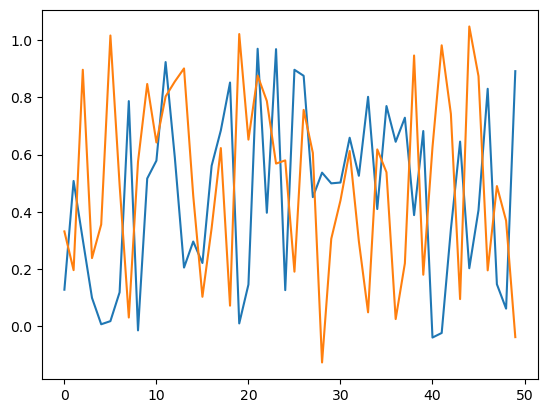

In [26]:
plt.plot(part1)
plt.plot(part2)

# DTW

In [27]:
from dtw import dtw
import numpy as np

Q = np.array([0, 1, 0, -1, 0], dtype=float)
x_coarse = np.linspace(0, 2 * np.pi, len(Q))
x_fine = np.linspace(0, 2 * np.pi, 9)
C = np.sin(x_fine)

# Must pass a distance function directly
manhattan = lambda x, y: np.abs(x - y)

alignment = dtw(
    Q.reshape(-1, 1),
    C.reshape(-1, 1),
    keep_internals=False,
    step_pattern="symmetric1",
    distance_only=False,
)

print("DTW distance:", alignment.distance)

# Uniform scaling
Q_scaled = np.interp(x_fine, x_coarse, Q)
uniform_dist = np.linalg.norm(Q_scaled - C)
print("Uniform x-axis scaling distance:", uniform_dist)

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.

DTW distance: 1.1715728752538102
Uniform x-axis scaling distance: 0.4142135623730951


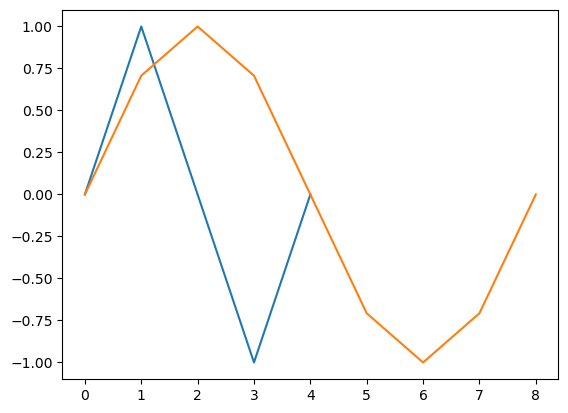

In [28]:
plt.plot(Q)
plt.plot(C)

In [29]:
C

array([ 0.00000000e+00,  7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
        1.22464680e-16, -7.07106781e-01, -1.00000000e+00, -7.07106781e-01,
       -2.44929360e-16])

In [30]:
import numpy as np
from dtaidistance import ed as dtaidistance_ed
from dtaidistance import dtw, dtw_visualisation
import pandas as pd
import matplotlib.pyplot as plt
from tslearn import metrics
from scipy.signal import sawtooth
from tqdm import tqdm
import time
from tslearn.datasets import UCR_UEA_datasets
import random

In [31]:
# Imported Python files do not automatically reload after you modify them
# M1: Automatically Reload
%load_ext autoreload
%autoreload 2
# M2: Manual Reload
# import importlib
# import ksfdtw
# importlib.reload(ksfdtw)

# https://stackoverflow.com/questions/20309456/how-do-i-call-a-function-from-another-py-file
from ksfdtw.distance_measures import linear_interpolation, nearest_neighbor_interpolation

Create toy example for testing the idea of PSDTW.

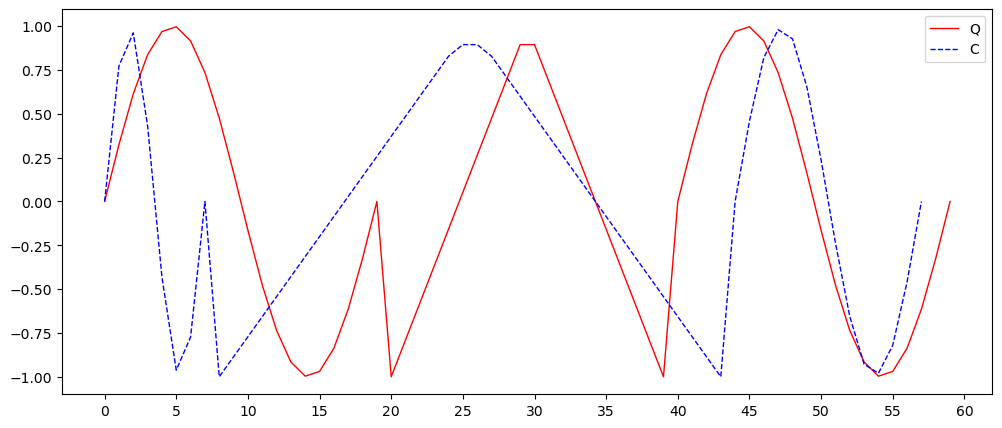

(60, 58)

In [32]:
# Step 1: Create segments
def generate_segments():
    s1 = np.sin(np.linspace(0, 2 * np.pi, 20))  # 30
    # s1 = np.linspace(0, 1, 15)
    s2 = sawtooth(np.linspace(0, 2 * np.pi, 20), 0.5)  # Triangle wave (periodic) # 20
    # s2 = np.concatenate([np.ones(10), np.linspace(1, 0.5, 5)])
    s3 = np.tile([-1, 1], 20)
    tail = np.linspace(1, 0, 30)
    return s1, s2, s3, tail
    # return s1, s2, tail


# Step 3: Compose sequences
def create_series(with_tail=False):
    s1, s2, s3, tail = generate_segments()
    # s1, s2, tail = generate_segments()
    Q = np.concatenate([s1, s2, s1])
    # Q = np.concatenate([s1, s2])
    C = np.concatenate(
        [
            linear_interpolation(s1, int(len(s1) * 0.4)),
            linear_interpolation(s2, int(len(s2) * 1.8)),
            linear_interpolation(s1, int(len(s1) * 0.7)),
        ]
    )
    if with_tail:
        C = np.concatenate([C, tail])
    return Q, C


Q, C = create_series(False)


# Step 4: Plotting with ground truth segment boundaries
def plot_segmented_series(Q, C):
    plt.figure(figsize=(12, 5))
    plt.plot(Q, label="Q", color="red", linewidth=1)
    plt.plot(C, label="C", color="blue", linestyle="--", linewidth=1)

    # for idx in q_segments[1:-1]:  # skip 0 and end
    #     plt.axvline(idx, color='blue', linestyle='--', alpha=0.5)
    # for idx in c_segments[1:-1]:
    #     plt.axvline(idx, color='red', linestyle=':', alpha=0.5)

    # plt.title("Segmented Time Series with Expression Rate Difference + Tail")
    from matplotlib.ticker import MultipleLocator

    plt.gca().xaxis.set_major_locator(MultipleLocator(5))
    plt.legend()
    # plt.grid(True)
    # plt.xlabel("Time index")
    # plt.ylabel("Value")
    plt.show()


# # Step 5: Ground truth (simulated for this synthetic case)
# q_segments = [0, 30, 60, 90]  # Original segments in Q
# c_segments = [0,
#               len(scale_segment(np.linspace(0, 1, 30), 0.7)),
#               len(scale_segment(np.linspace(0, 1, 30), 0.7)) +
#               len(scale_segment(np.ones(30), 1.3)),
#               len(C)]  # including tail

plot_segmented_series(Q, C)
len(Q), len(C)

In [33]:
test = np.array(
    [
        0,
        1,
        2,
        3,
        4,
        5,
    ]
)
test[3:6][::-1]

array([5, 4, 3])

Test for nearest_neighbor_interpolation

In [34]:
Q[0:13], nearest_neighbor_interpolation(Q[0:13], 10)

(array([ 0.        ,  0.32469947,  0.61421271,  0.83716648,  0.96940027,
         0.99658449,  0.91577333,  0.73572391,  0.47594739,  0.16459459,
        -0.16459459, -0.47594739, -0.73572391]),
 array([ 0.        ,  0.32469947,  0.83716648,  0.96940027,  0.99658449,
         0.73572391,  0.47594739,  0.16459459, -0.47594739, -0.73572391]))

In [35]:
C[0:10], nearest_neighbor_interpolation(Q[0:10], 10)

(array([ 0.00000000e+00,  7.73465402e-01,  9.61951136e-01,  4.31468421e-01,
        -4.31468421e-01, -9.61951136e-01, -7.73465402e-01, -2.44929360e-16,
        -1.00000000e+00, -8.85714286e-01]),
 array([0.        , 0.32469947, 0.61421271, 0.83716648, 0.96940027,
        0.99658449, 0.91577333, 0.73572391, 0.47594739, 0.16459459]))

In [36]:
Q[0:13][::-1], nearest_neighbor_interpolation(Q[0:13][::-1], 10)

(array([-0.73572391, -0.47594739, -0.16459459,  0.16459459,  0.47594739,
         0.73572391,  0.91577333,  0.99658449,  0.96940027,  0.83716648,
         0.61421271,  0.32469947,  0.        ]),
 array([-0.73572391, -0.47594739,  0.16459459,  0.47594739,  0.73572391,
         0.99658449,  0.96940027,  0.83716648,  0.32469947,  0.        ]))

In [37]:
nearest_neighbor_interpolation(Q[0:13], 10), nearest_neighbor_interpolation(
    Q[0:13][::-1], 10
)[::-1]

(array([ 0.        ,  0.32469947,  0.83716648,  0.96940027,  0.99658449,
         0.73572391,  0.47594739,  0.16459459, -0.47594739, -0.73572391]),
 array([ 0.        ,  0.32469947,  0.83716648,  0.96940027,  0.99658449,
         0.73572391,  0.47594739,  0.16459459, -0.47594739, -0.73572391]))

In [38]:
nearest_neighbor_interpolation(Q[0:13], 10), nearest_neighbor_interpolation(
    Q[0:13][::-1], 10
)[::-1]

(array([ 0.        ,  0.32469947,  0.83716648,  0.96940027,  0.99658449,
         0.73572391,  0.47594739,  0.16459459, -0.47594739, -0.73572391]),
 array([ 0.        ,  0.32469947,  0.83716648,  0.96940027,  0.99658449,
         0.73572391,  0.47594739,  0.16459459, -0.47594739, -0.73572391]))

In [39]:
def dtai_dtw(a, b, l=1, r=0.1):
    if isinstance(r, float):
        # print("r is a float.")
        minlen = min(len(a), len(b))
        window = int(minlen * r)
    elif isinstance(r, int):
        # Do something when r is an int
        # print("r is an integer.")
        window = r
    else:
        raise ValueError("r must be either an integer or a float.")
    return dtw.distance(a, b, window=window)

In [40]:
dtai_dtw(
    nearest_neighbor_interpolation(Q[0:13], 10),
    nearest_neighbor_interpolation(C[0:10], 10),
)

2.704259675595068

In [41]:
def us_usdtw_p(Q, C, l, r, L, distance_method="ed"):
    # Scaling both time series
    # m = len(Q)
    # n = len(C)
    # L = min(np.ceil(l * m), n)

    Q_scaled = nearest_neighbor_interpolation(Q, L)
    C_scaled = nearest_neighbor_interpolation(C, L)

    # Compute distance based on the chosen method
    if distance_method == "dtw":
        dist = dtai_dtw(Q_scaled, C_scaled, l, r)
    elif distance_method == "ed":
        dist = dtai_ed(Q_scaled, C_scaled)
    else:
        raise ValueError(f"Unsupported distance method: {distance_method}")

    return dist

In [42]:
L = 20
us_usdtw_p(Q[0:13][::-1], C[0:10][::-1], 2, 1.0, L, "dtw")

1.344564460982339

Some common time series libraries are listed as belows.
- [tslean](https://tslearn.readthedocs.io/en/stable/)
- [sktime](https://www.sktime.net/en/stable/)
- [pyts](https://pyts.readthedocs.io/en/stable/)
- [aeon](https://www.aeon-toolkit.org/en/stable/)
- [dtaidistance](https://dtaidistance.readthedocs.io/en/latest/)

And some time series database.
- [Time Series Classification Website](https://www.timeseriesclassification.com/index.php)

# Explore the dataset

About the dataset
- Class 1 is "gun" and class 2 is "no gun (pointing)"
- References
    - https://www.timeseriesclassification.com/description.php?Dataset=GunPoint
    - https://www.timeseriesclassification.com/description.php?Dataset=GunPointOldVersusYoung
    - https://rdrr.io/cran/LPStimeSeries/man/GunPoint.html
    - Related papers
        - https://www.cs.ucr.edu/~eamonn/DTW_myths.pdf
        - https://arxiv.org/pdf/1810.07758

Best match index: 0, Label: 1
Distance: 0.0000


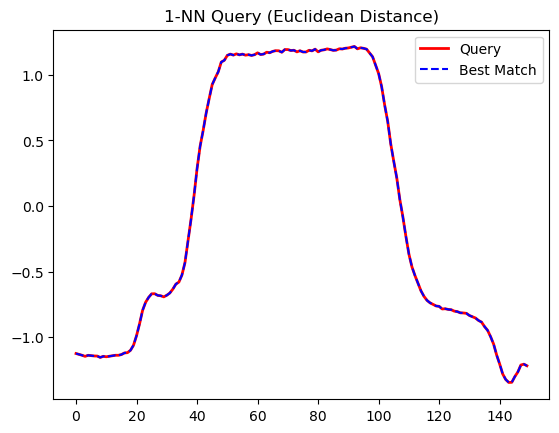

In [43]:
# Import dataset


# Load dataset
ucr = UCR_UEA_datasets()
X_train, y_train, X_test, y_test = ucr.load_dataset("GunPoint")
X_train = X_train.squeeze()

# Squeeze to 2D (n_samples, time_length)(univariate)
X_train = X_train.squeeze()
X_test = X_test.squeeze()

query_ts = X_test[0]


# Compute Euclidean distances to all training samples
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))


distances = np.array([euclidean_distance(query_ts, x) for x in X_test])

# Find best match
best_idx = np.argmin(distances)
best_match = X_test[best_idx]

print(f"Best match index: {best_idx}, Label: {y_test[best_idx]}")
print(f"Distance: {distances[best_idx]:.4f}")

# Plot
plt.plot(query_ts, label="Query", linewidth=2, color="red")
plt.plot(best_match, label="Best Match", linestyle="--", color="blue")
plt.legend()
plt.title("1-NN Query (Euclidean Distance)")
plt.show()

In [44]:
Q = X_test[y_test == 1][0]

In [45]:
P = 3
m = len(Q)
m_p = np.floor(m / 3).astype(int)

P, m, m_p

(3, 150, np.int64(50))

In [46]:
# # Create P subsequences
# subsequences = [Q[i*m_p:(i+1)*m_p] for i in range(P)]

# # Print the subsequences to verify
# for idx, subseq in enumerate(subsequences):
#     print(f"Subsequence {idx+1}: {subseq}")
# len(subsequences)

In [47]:
# Example time series data (Q) and number of subsequences (P)
Q = X_test[y_test == 1][0]
P = 3

m = len(Q)
subseq_length = np.floor(m / P).astype(int)  # Length of each subsequence
remainder = (
    m % P
)  # Remainder to distribute, how many subsequences should have one extra value

# Create P subsequences
subsequences = []
start_idx = 0

for i in range(P):
    # Determine the end index for the current subsequence
    end_idx = (
        start_idx + subseq_length + (1 if i < remainder else 0)
    )  # For each subsequence, we add one extra element if the subsequence index is less than the remainder.
    subsequences.append(Q[start_idx:end_idx])
    start_idx = end_idx  # Update start index for next subsequence

# Print the subsequences to verify
for idx, subseq in enumerate(subsequences):
    print(f"Subsequence {idx+1}: {subseq}")
    print(len(subseq))

Subsequence 1: [-1.1250133  -1.1313383  -1.1382884  -1.1466873  -1.1386387  -1.1414312
 -1.1436908  -1.1443789  -1.1549123  -1.1464212  -1.1497246  -1.1457227
 -1.1419403  -1.1384288  -1.1385201  -1.1329855  -1.1206946  -1.1185964
 -1.1005789  -1.0618869  -0.98877018 -0.89804927 -0.79586606 -0.73432104
 -0.69687043 -0.66992052 -0.66910759 -0.68194036 -0.68481332 -0.69305372
 -0.68082429 -0.66386028 -0.63402064 -0.5958185  -0.58019191 -0.52662465
 -0.43224316 -0.27027162 -0.10318644  0.07854224  0.28436347  0.45409849
  0.57409933  0.70714616  0.8182297   0.92508286  0.97561574  1.0226481
  1.0969569   1.1102969 ]
50
Subsequence 2: [1.1479976 1.1575769 1.1498129 1.1594703 1.1517029 1.157521  1.1494632
 1.153298  1.1473326 1.1530236 1.1671015 1.1542641 1.1576391 1.1720068
 1.1678774 1.1783764 1.1837646 1.1829012 1.1717443 1.192459  1.1921674
 1.184896  1.1869894 1.1746437 1.183216  1.1736466 1.1736466 1.1868374
 1.1821363 1.1953776 1.174863  1.1868828 1.1903198 1.1972967 1.1923345
 1.186

In [48]:
l = 2
random.seed(20)
for idx, subseq in enumerate(subsequences):
    print("old length", len(subseq))
    new_length = random.randint(
        np.ceil(m_p / l).astype(int), np.ceil(m_p * l).astype(int)
    )
    subsequences[idx] = nearest_neighbor_interpolation(subsequences[idx], new_length)
    print(f"Subsequence {idx+1}: {subseq}")
    print(len(subsequences[idx]))

old length 50
Subsequence 1: [-1.1250133  -1.1313383  -1.1382884  -1.1466873  -1.1386387  -1.1414312
 -1.1436908  -1.1443789  -1.1549123  -1.1464212  -1.1497246  -1.1457227
 -1.1419403  -1.1384288  -1.1385201  -1.1329855  -1.1206946  -1.1185964
 -1.1005789  -1.0618869  -0.98877018 -0.89804927 -0.79586606 -0.73432104
 -0.69687043 -0.66992052 -0.66910759 -0.68194036 -0.68481332 -0.69305372
 -0.68082429 -0.66386028 -0.63402064 -0.5958185  -0.58019191 -0.52662465
 -0.43224316 -0.27027162 -0.10318644  0.07854224  0.28436347  0.45409849
  0.57409933  0.70714616  0.8182297   0.92508286  0.97561574  1.0226481
  1.0969569   1.1102969 ]
44
old length 50
Subsequence 2: [1.1479976 1.1575769 1.1498129 1.1594703 1.1517029 1.157521  1.1494632
 1.153298  1.1473326 1.1530236 1.1671015 1.1542641 1.1576391 1.1720068
 1.1678774 1.1783764 1.1837646 1.1829012 1.1717443 1.192459  1.1921674
 1.184896  1.1869894 1.1746437 1.183216  1.1736466 1.1736466 1.1868374
 1.1821363 1.1953776 1.174863  1.1868828 1.190319

In [49]:
Q_scaled = np.concatenate(subsequences)

In [50]:
len(Q_scaled)

139

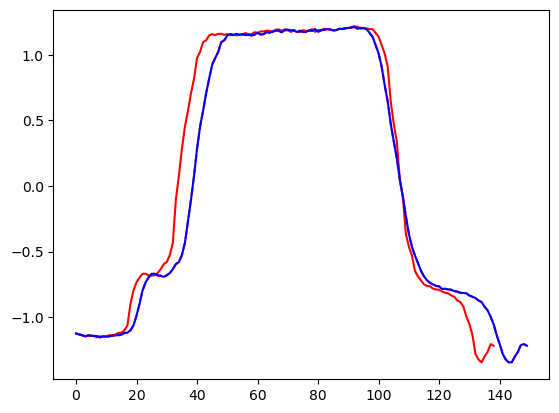

In [51]:
plt.plot(Q, color="red", linestyle="--")
plt.plot(Q_scaled, color="red")
plt.plot(X_test[0], color="blue")
# plt.axis('off')
plt.show()

In [52]:
test1 = nearest_neighbor_interpolation(Q_scaled, 50)
test2 = nearest_neighbor_interpolation(X_test[0], 50)

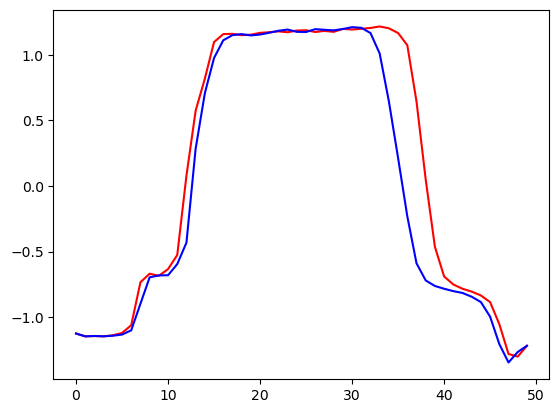

In [53]:
plt.plot(test1, color="red")
plt.plot(test2, color="blue")

In [54]:
L = int(np.ceil(min(2 * len(test1), len(test2)) / 3))
L

17

We can discover the cutting points of segments by PSDTW.

In [55]:
# from ksfdtw.lower_bounds import lb_kim_first_last, lb_shen_without_last, lb_dummy

In [56]:
# def ps_distance_p(
#     Q, C, l, r, L, P, distance_method="ed", lower_bound_method=lb_kim_first_last
# ):

#     no_of_iteration = 0
#     m, n = len(Q), len(C)
#     LQ_avg, LC_avg = np.floor(m / P), np.floor(n / P)  # Expected length
#     # Minimum cost to align the **first i** elements of Q and the **first j** elements of C using P exactly segments
#     D = np.full((m + 1, n + 1, P + 1), np.inf)

#     # backtrack = np.full((m+1, n+1, P+1, 2), -1, dtype=int)  # The last dimension is used to store a pair of cutting points
#     # Parent table to trace back: stores (prev_i, prev_j)
#     parent = [
#         [[(None, None) for _ in range(P + 1)] for _ in range(n + 1)]
#         for _ in range(m + 1)
#     ]  # backtracking

#     # Distance cache: (qi_st, i, cj_st, j) → distance
#     lb_cache = {}
#     dist_cache = {}

#     D[0][0][0] = 0  # Base case

#     # total_iters = P * m * n
#     # progress = tqdm(total=total_iters, desc="DP Progress") # For progress tracking
#     # start_time = time.time() # Timing

#     for p in range(1, P + 1):
#         for i in range(1, m + 1):
#             for j in range(1, n + 1):

#                 # progress.update(1)
#                 # print("p i j", p, i, j)
#                 best_so_far = np.inf
#                 for lc in range(
#                     int(np.ceil(LQ_avg / l)), min(int(np.ceil(LQ_avg * l)), i) + 1
#                 ):
#                     # j is not long enough for the segment in C to exist for this length =lc segment in Q
#                     if j < int(np.ceil(lc / l)):
#                         continue
#                     qi_st = i - lc

#                     # Cascading
#                     lower_bound = np.min(D[qi_st, :, p - 1])
#                     if lower_bound > D[i][j][p]:  # best_so_far
#                         continue
#                     lower_bound = lower_bound + lb_shen_without_last(
#                         Q[qi_st:i][::-1], C[j - int(np.ceil(lc / l)) : j][::-1], l, r
#                     )
#                     if lower_bound > D[i][j][p]:  # best_so_far
#                         continue

#                     for lq in range(
#                         int(np.ceil(lc / l)), min(int(np.ceil(lc * l)), j) + 1
#                     ):
#                         # for lq in range(max(1, int(np.ceil(LC_avg/l))), min(int(np.ceil(LC_avg*l)), j)+1):
#                         # if (lc/lq >l) or (lq/lc >l): # scaling constraint
#                         #     continue
#                         # print("Q_p C_p Q_p/C_p", Q_p, C_p, Q_p/C_p)
#                         cj_st = j - lq
#                         # Q[cj_st:i]
#                         prev_cost = D[qi_st][cj_st][p - 1]
#                         # Cascading
#                         if prev_cost == np.inf:  # Stop expensive computation
#                             continue
#                         if (
#                             prev_cost > D[i][j][p]
#                         ):  # what we currently have is the upper bound of the real value
#                             continue
#                         key = (qi_st, i, cj_st, j)
#                         # lower bound pruning
#                         if key not in lb_cache:
#                             lb_cache[key] = lower_bound_method(
#                                 Q[qi_st:i], C[cj_st:j], l, r
#                             )
#                         if lb_cache[key] + prev_cost >= D[i][j][p]:
#                             continue  # Skip: can't improve
#                         if key not in dist_cache:
#                             dist_cache[key] = us_usdtw_p(
#                                 Q[qi_st:i], C[cj_st:j], l, r, L, distance_method
#                             )
#                             no_of_iteration = no_of_iteration + 1
#                             # dist_cache[key] = dtaidistance_ed.distance(Q[qi_st:i], C[cj_st:j])
#                         cost = dist_cache[key]
#                         # test
#                         # temp1=lb_shen(Q[qi_st:i], C[j-int(np.ceil(lc/l)):j], l, r)
#                         # temp2=us_usdtw_p(Q[qi_st:i], C[cj_st:j], l, r, distance_method)
#                         # if temp1 > temp2:
#                         #     print("i, j qi_st cj_st lb, usdtw",i, j, qi_st, cj_st, temp1, temp2)
#                         #     print("Fuck. Here you are.")

#                         new_cost = prev_cost + cost
#                         if new_cost < D[i][j][p]:
#                             D[i][j][p] = new_cost
#                             parent[i][j][p] = (qi_st, cj_st)
#                         # D[i][j][p] = min(D[i][j][p], D[qi_st][cj_st][p-1]+cost)

#     # progress.close()
#     # elapsed = time.time() - start_time
#     # print(f"Total iterations: {no_of_iteration}")
#     # print(f"\nTotal time: {elapsed:.2f} seconds")
#     # Backtracking to recover the cutting points
#     cuts = []
#     i, j, p = m, n, P
#     while p > 0:
#         qi_st, cj_st = parent[i][j][p]
#         cuts.append(((qi_st, i), (cj_st, j)))  # Q segment, C segment
#         i, j, p = qi_st, cj_st, p - 1
#     cuts.reverse()
#     return D[m][n][P], cuts, no_of_iteration
#     # return D[m][n][P]

#     # # Base case
#     # p = 1
#     # for i_e in range(2, m+1): # e: ending, we need (m+1) to enumerate until m (inclusive)
#     #     for j_e in range(2, n+1): # same as above
#     #         m_p, n_p = i_e-0, j_e-0 # lengths of the two subsequence under comparison
#     #         if (m_p > l*(n_p)) or (n_p > l*(m_p)): # scaling constraint
#     #             continue
#     #         if m_p < np.floor(s_Q/l) or n_p < np.floor(s_C/l): # min length of each subsequence constraint
#     #             continue
#     #         if m_p > np.floor(s_Q*l) or n_p > np.floor(s_C*l): # max length of each subsequence constraint
#     #             continue
#     #         dist = us_usdtw_p(Q[0:i_e], C[0:j_e], l, "dtw") # Sequences from 0 to i_e (j_e) (exclusive)
#     #         #
#     #         # dist, _ = lb_shen_argmin_q(Q[0:i_e], C[0:j_e], l)

#     #         D[i_e-1, j_e-1, p-1] = dist # i_e-1 and j_e-1 as the indics for ending of Q, C in D are inclusive.
#     #         # p -1 as it counts from 0.
#     #         backtrack[i_e-1, j_e-1, p-1] = [0, 0]
#     #         no_of_iteration = no_of_iteration + 1
#     # # Recursive case
#     # for p in range(2, P+1):
#     #     # Assigned length of previous subsequence constraint
#     #     Q_occupied = 0
#     #     C_occupied = 0
#     #     Q_occupied = int(np.floor((s_Q/l)*(p-1)))
#     #     C_occupied = int(np.floor((s_C/l)*(p-1)))
#     #     for i_e in range(Q_occupied+2, m+1): # (Q_occupied+1) is the first available time stamps
#     #         for j_e in range(C_occupied+2, n+1): # same as above
#     #             best_so_far = np.inf

In [57]:
# D, backtrack, _ = ps_distance_p(test1, test2, 2, 0.1, L, 3, "dtw", lb_dummy)  # 16580.84

In [58]:
# D

In [59]:
# backtrack

In [60]:
# hello world
print("hello world")

hello world
